In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from preprocess import load_data, load_clean_data, data_stats, create_features, create_features_labels
from plots import plot_validation_diagram, plot_samples, plot_avg, plot_ewma, detect_raw_signal
from IPython.display import display
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.
/home/buzz/anaconda3/envs/py3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Load model

In [2]:
top_model_path = 'weights/top_model_navlr.h5'
classes = ['A', 'L', 'N', 'NB', 'R', 'V']
tm = load_model(top_model_path)

### Experiment with raw signal

In [13]:
ecg = pd.read_csv('dataset/ecg_20180103_140740.csv')

In [14]:
ecg.describe()

,id,delay,ecg
count,12965.000000,12965.000000,12965.000000
mean,6483.000000,3013.036020,520.802777
std,3742.817455,38.927832,88.705078
min,1.000000,2875.000000,190.000000
25%,3242.000000,3001.000000,477.000000
50%,6483.000000,3019.000000,495.000000
75%,9724.000000,3034.000000,544.000000
max,12965.000000,3966.000000,984.000000


In [66]:
class EcgCleaner:
    def __init__(self, alpha):
        self.avgEcg = 0.
        self.alpha = alpha
        
    def update(self, sample):
        self.avgEcg = self.avgEcg * (1 - self.alpha) + sample['ecg'] * self.alpha
        return self.avgEcg

In [102]:
def detect(alpha = 1., start = 0, end = 1000):
    scaler = MinMaxScaler()
    cleaner = EcgCleaner(alpha)
    for i, val in ecg.iterrows():
        ecg.at[i, 'clean'] = cleaner.update(val)
    ecg['S'] = scaler.fit_transform(ecg['clean'].values.reshape(-1,1))
    detect_raw_signal(tm, classes, ecg, start, end)

/home/buzz/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


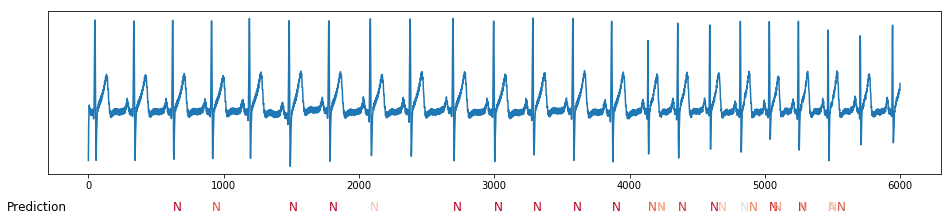

In [103]:
detect(alpha=1., start = 0, end = 6000)

/home/buzz/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


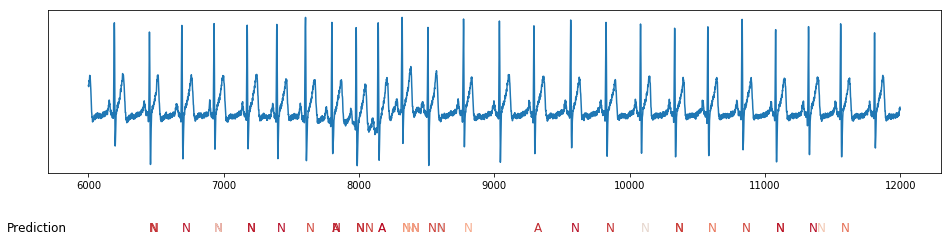

In [106]:
detect(.7, 6000, 12000) # smoothing .4

/home/buzz/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


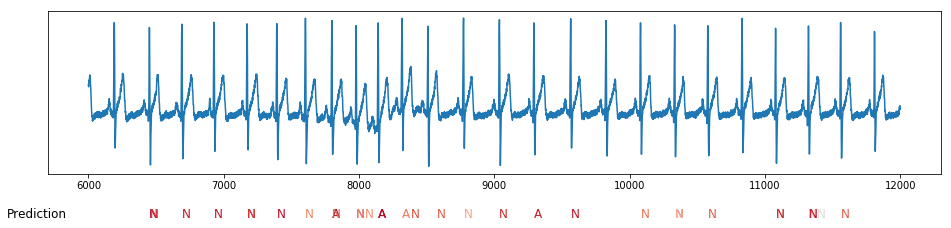

In [105]:
detect(1., 6000, 12000) # no smoothing